In [2]:
from __future__ import division
from __future__ import unicode_literals
from __future__ import absolute_import
import pandas as pd
import numpy as np
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
#from rdkit.Avalon.pyAvalonTools import GetAvalonFP
import rdkit.rdBase
from rdkit.Chem.MACCSkeys import GenMACCSKeys
from rdkit import DataStructs
from rdkit.DataStructs import BitVectToText
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.Chem import Descriptors as Descriptors
from rdkit.Chem.EState import Fingerprinter
from rdkit.ML.Descriptors import MoleculeDescriptors

from rdkit.Chem import PandasTools as PandasTools
from rdkit.Chem import Descriptors as Descriptors

import matplotlib.pyplot as plt

from scipy.stats import randint
from numpy import argmax
from scipy import stats

In [3]:
from sklearn.metrics import cohen_kappa_score

In [4]:
import sklearn
sklearn.__version__

'1.1.1'

In [5]:
from collections import Counter
from sklearn.metrics import cohen_kappa_score

#Cmax significance with each other (with DILI compounds)

In [7]:
cmax_data = pd.read_csv("../Cmax_processed.csv.gz")
cmax_data

,SMILES,median pMolar total plasma concentration,median pMolar unbound plasma concentration,Standardized_SMILES,Standardized_InChI
0,C#CC(O)(/C=C/Cl)CC,4.257078,NaN,C#CC(O)(C=CCl)CC,"InChI=1S/C7H9ClO/c1-3-7(9,4-2)5-6-8/h1,5-6,9H,..."
1,C#CC1(OC(N)=O)CCCCC1,4.223262,NaN,C#CC1(OC(N)=O)CCCCC1,InChI=1S/C9H13NO2/c1-2-9(12-8(10)11)6-4-3-5-7-...
2,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=Cc5oncc5C[C@]4(...,6.227192,NaN,C#CC1(O)CCC2C3CCC4=Cc5oncc5CC4(C)C3CCC21C,InChI=1S/C22H27NO2/c1-4-22(24)10-8-18-16-6-5-1...
3,C(=C/c1ccccc1)\CN1CCN(C(c2ccccc2)c2ccccc2)CC1,6.047947,NaN,C(=Cc1ccccc1)C[NH+]1CC[NH+](C(c2ccccc2)c2ccccc...,InChI=1S/C26H28N2/c1-4-11-23(12-5-1)13-10-18-2...
4,C/C=C/C[C@@H](C)[C@@H](O)[C@H]1C(=O)N[C@@H](CC...,6.111649,7.279140,CC=CCC(C)C(O)C1C(=O)NC(CC)C(=O)[NH+](C)CC(=O)[...,InChI=1S/C62H111N11O12/c1-25-27-28-40(15)52(75...
...,...,...,...,...,...
753,Oc1nc(O)c2cn[nH]c2n1,4.006067,NaN,O=c1[n-]c(=O)c2c[n-]nc2[n-]1,InChI=1S/C5H3N4O2/c10-4-2-1-6-9-3(2)7-5(11)8-4...
754,Oc1ncnc2[nH]ncc12,3.855136,3.868365,O=c1[n-]cnc2[n-]ncc12,InChI=1S/C5H3N4O/c10-5-3-1-8-9-4(3)6-2-7-5/h1-...
755,Sc1ncnc2nc[nH]c12,6.483388,6.553969,S=c1[n-]cnc2[n-]cnc12,InChI=1S/C5H3N4S/c10-5-3-4(7-1-6-3)8-2-9-5/h1-...
756,c1ccc([C@H]2CN3CCSC3=N2)cc1,5.459929,NaN,c1ccc(C2CN3CCSC3=[NH+]2)cc1,InChI=1S/C11H12N2S/c1-2-4-9(5-3-1)10-8-13-6-7-...


In [8]:
#train_data= pd.read_csv("../Train_data_liv_tox_18825.csv")
#test_data= pd.read_csv("../Test_data_DILIst_1275.csv")

train_data= pd.read_csv("../../data/Livtox_withoverlapcompounds_DILI.csv")
train_data = train_data[~train_data.Source_rank.isin([4, 9, 12])].reset_index(drop=True)
train_data

,smiles_r,TOXICITY,Source_rank,Source
0,C[C@H](N)C(=O)N[C@@H](C)C(=O)NC1[C@@H]2CN(c3nc...,1,2,"Liver Toxicity Knowledge Base (LTKB), prescrip..."
1,C=CCOc1ccc(CC(=O)O)cc1Cl,1,2,"Liver Toxicity Knowledge Base (LTKB), prescrip..."
2,CCCN(CCC)C(=O)Cc1c(-c2ccc(Cl)cc2)nc2ccc(Cl)cn12,1,2,"Liver Toxicity Knowledge Base (LTKB), prescrip..."
3,O=C(O)CCCCCCNC1c2ccccc2CCc2ccccc21,1,2,"Liver Toxicity Knowledge Base (LTKB), prescrip..."
4,O=C(O)COc1nn(Cc2ccccc2)c2ccccc12,1,2,"Liver Toxicity Knowledge Base (LTKB), prescrip..."
...,...,...,...,...
18674,COC[C@H]1OC(=O)c2coc3c2[C@@]1(C)C1=C(C3=O)[C@@...,0,16,Reactive Metabolite Mazzolari et al
18675,CCOC(=O)CN[C@@H](C(=O)N1CC[C@H]1C(=O)NCc1ccc(/...,0,16,Reactive Metabolite Mazzolari et al
18676,C=C(C)[C@@]12OC3(/C=C/C=C/CCCCC)O[C@@H]1[C@@H]...,0,16,Reactive Metabolite Mazzolari et al
18677,O=C1Cc2cc(CCN3CCN(c4nsc5ccccc45)CC3)c(Cl)cc2N1,0,16,Reactive Metabolite Mazzolari et al


In [9]:
test_data= pd.read_csv("../Test_data_DILIst_1275.csv")[["smiles_r","TOXICITY","Source_rank","Source"]]
test_data["Source_rank"] = "DILI"
test_data

,smiles_r,TOXICITY,Source_rank,Source
0,CCN(CC)c1cc(C)nc2ncnn12,1,DILI,DILIst Classification
1,CCN(CC)CC(=O)Oc1ccc(NC(C)=O)cc1,1,DILI,DILIst Classification
2,CCN(CC)Cc1cc(Nc2ccnc3cc(Cl)ccc23)ccc1O,1,DILI,DILIst Classification
3,CCN(CC)CCCC(C)Nc1ccnc2cc(Cl)ccc12,1,DILI,DILIst Classification Oral
4,CCN(CC)CCN1C(=O)CN=C(c2ccccc2F)c2cc(Cl)ccc21,1,DILI,DILIst Classification Oral
...,...,...,...,...
1270,O=C(N[C@@H](CO)[C@H](O)c1ccc([N+](=O)[O-])cc1)...,0,DILI,DILIrank dataset CP Overlap REpsilber
1271,C[C@H]1O[C@@H](O[C@H]2[C@@H](O)C[C@H](O[C@H]3[...,0,DILI,DILIrank dataset CP Overlap REpsilber
1272,C=C1/C(=C\C=C2/CCC[C@@]3(C)[C@H]2CC[C@@H]3[C@H...,0,DILI,DILIrank dataset CP Overlap REpsilber
1273,CCC(=O)NCC[C@@H]1CCc2ccc3c(c21)CCO3,0,DILI,DILIrank dataset CP Overlap REpsilber


In [10]:
#For this excercise we have NOT removed compounds that are also present in the DILI dataset
train_data = train_data[~train_data.Source_rank.isin([4, 9, 12])].reset_index(drop=True)
train_data

,smiles_r,TOXICITY,Source_rank,Source
0,C[C@H](N)C(=O)N[C@@H](C)C(=O)NC1[C@@H]2CN(c3nc...,1,2,"Liver Toxicity Knowledge Base (LTKB), prescrip..."
1,C=CCOc1ccc(CC(=O)O)cc1Cl,1,2,"Liver Toxicity Knowledge Base (LTKB), prescrip..."
2,CCCN(CCC)C(=O)Cc1c(-c2ccc(Cl)cc2)nc2ccc(Cl)cn12,1,2,"Liver Toxicity Knowledge Base (LTKB), prescrip..."
3,O=C(O)CCCCCCNC1c2ccccc2CCc2ccccc21,1,2,"Liver Toxicity Knowledge Base (LTKB), prescrip..."
4,O=C(O)COc1nn(Cc2ccccc2)c2ccccc12,1,2,"Liver Toxicity Knowledge Base (LTKB), prescrip..."
...,...,...,...,...
18674,COC[C@H]1OC(=O)c2coc3c2[C@@]1(C)C1=C(C3=O)[C@@...,0,16,Reactive Metabolite Mazzolari et al
18675,CCOC(=O)CN[C@@H](C(=O)N1CC[C@H]1C(=O)NCc1ccc(/...,0,16,Reactive Metabolite Mazzolari et al
18676,C=C(C)[C@@]12OC3(/C=C/C=C/CCCCC)O[C@@H]1[C@@H]...,0,16,Reactive Metabolite Mazzolari et al
18677,O=C1Cc2cc(CCN3CCN(c4nsc5ccccc45)CC3)c(Cl)cc2N1,0,16,Reactive Metabolite Mazzolari et al


In [11]:
train_data = pd.concat([train_data, test_data]).reset_index(drop=True)
train_data

,smiles_r,TOXICITY,Source_rank,Source
0,C[C@H](N)C(=O)N[C@@H](C)C(=O)NC1[C@@H]2CN(c3nc...,1,2,"Liver Toxicity Knowledge Base (LTKB), prescrip..."
1,C=CCOc1ccc(CC(=O)O)cc1Cl,1,2,"Liver Toxicity Knowledge Base (LTKB), prescrip..."
2,CCCN(CCC)C(=O)Cc1c(-c2ccc(Cl)cc2)nc2ccc(Cl)cn12,1,2,"Liver Toxicity Knowledge Base (LTKB), prescrip..."
3,O=C(O)CCCCCCNC1c2ccccc2CCc2ccccc21,1,2,"Liver Toxicity Knowledge Base (LTKB), prescrip..."
4,O=C(O)COc1nn(Cc2ccccc2)c2ccccc12,1,2,"Liver Toxicity Knowledge Base (LTKB), prescrip..."
...,...,...,...,...
19949,O=C(N[C@@H](CO)[C@H](O)c1ccc([N+](=O)[O-])cc1)...,0,DILI,DILIrank dataset CP Overlap REpsilber
19950,C[C@H]1O[C@@H](O[C@H]2[C@@H](O)C[C@H](O[C@H]3[...,0,DILI,DILIrank dataset CP Overlap REpsilber
19951,C=C1/C(=C\C=C2/CCC[C@@]3(C)[C@H]2CC[C@@H]3[C@H...,0,DILI,DILIrank dataset CP Overlap REpsilber
19952,CCC(=O)NCC[C@@H]1CCc2ccc3c(c21)CCO3,0,DILI,DILIrank dataset CP Overlap REpsilber


In [12]:
for i in train_data.Source_rank.unique():

 if (len(train_data[train_data["Source_rank"]==2]) != len(train_data[train_data["Source_rank"]==2].smiles_r.unique())):
    print(i)

In [13]:
all_sources_list = [ 2,  3,  5,  6,  7,  8,  10, 11, 14, 15, 16, "DILI"]
all_sources_list

[2, 3, 5, 6, 7, 8, 10, 11, 14, 15, 16, 'DILI']

2
14
median pMolar total plasma concentration
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

toxic v.s. nontoxic: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.692e-01 U_stat=1.400e+01
Hi


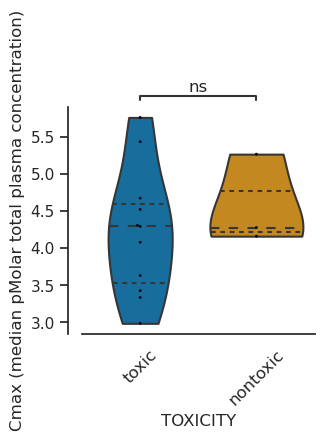

8
median pMolar unbound plasma concentration
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

toxic v.s. nontoxic: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.429e-01 U_stat=8.000e+00
Hi


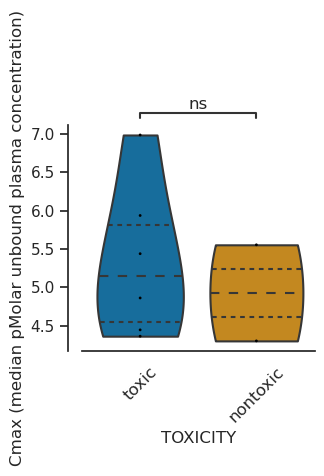

3
68
median pMolar total plasma concentration
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

toxic v.s. nontoxic: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.876e-01 U_stat=3.560e+02
Hi


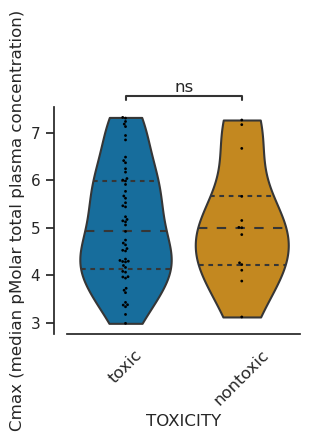

33
median pMolar unbound plasma concentration
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

toxic v.s. nontoxic: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.727e-01 U_stat=4.700e+01
Hi


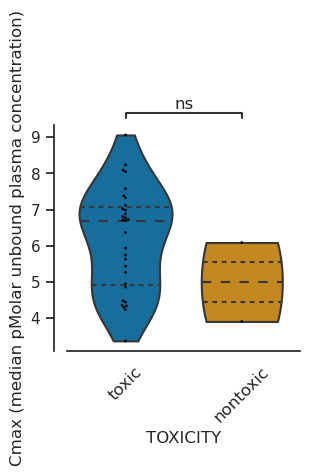

5
6
median pMolar total plasma concentration
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

toxic v.s. nontoxic: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.000e+00
Hi


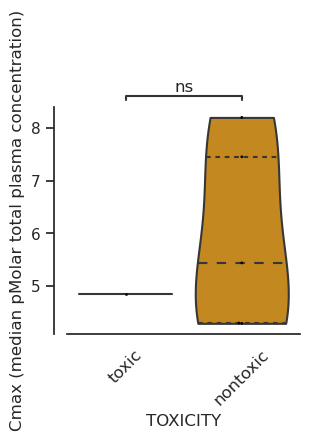

5
6
6
median pMolar total plasma concentration
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

toxic v.s. nontoxic: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.667e-01 U_stat=1.000e+00
Hi


<Figure size 300x300 with 0 Axes>

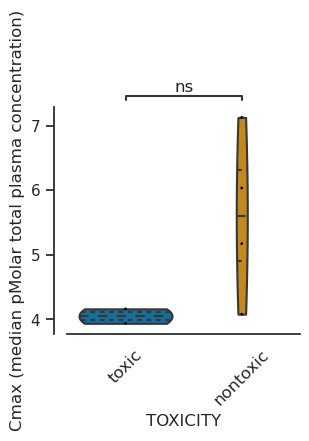

3
7
65
median pMolar total plasma concentration
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

toxic v.s. nontoxic: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.133e-01 U_stat=5.570e+02
Hi


<Figure size 300x300 with 0 Axes>

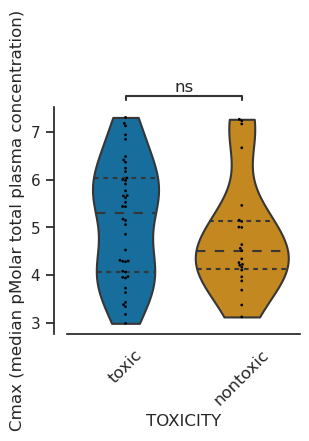

31
median pMolar unbound plasma concentration
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

toxic v.s. nontoxic: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.193e-01 U_stat=1.200e+02
Hi


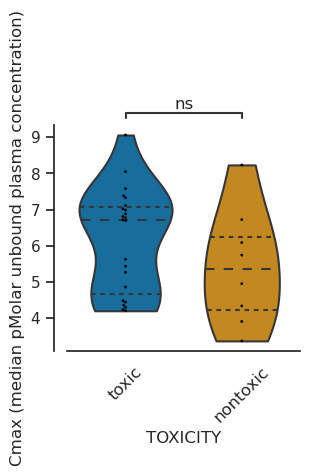

8
59
median pMolar total plasma concentration
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

toxic v.s. nontoxic: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.483e-02 U_stat=3.170e+02
Hi


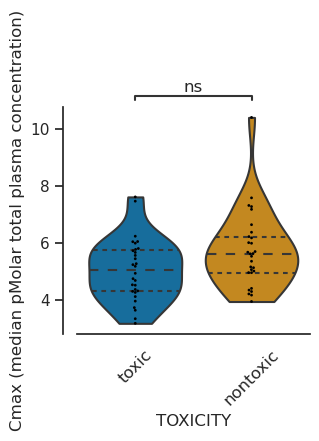

33
median pMolar unbound plasma concentration
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

toxic v.s. nontoxic: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.380e-01 U_stat=1.080e+02
Hi


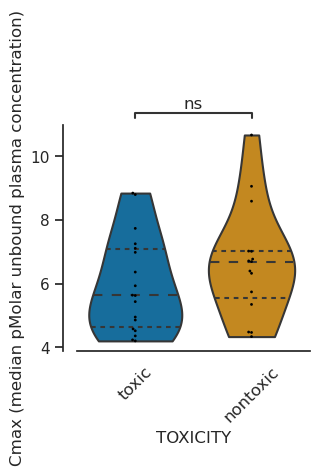

10
15
median pMolar total plasma concentration
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

toxic v.s. nontoxic: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.330e-01 U_stat=1.400e+01
Hi


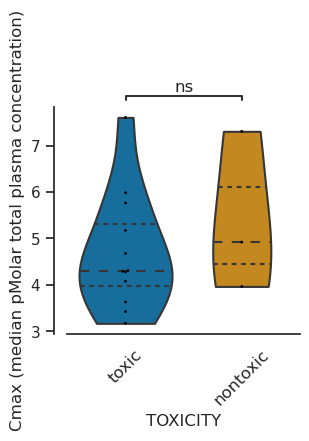

8
median pMolar unbound plasma concentration
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

toxic v.s. nontoxic: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.500e-01 U_stat=0.000e+00
Hi


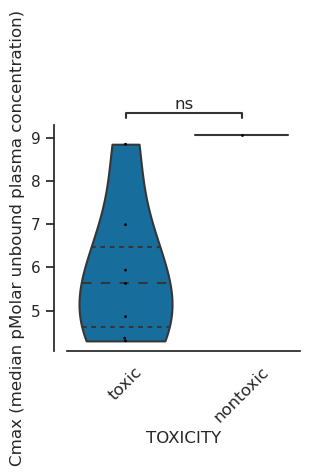

11
73
median pMolar total plasma concentration
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

toxic v.s. nontoxic: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.817e-01 U_stat=5.670e+02
Hi


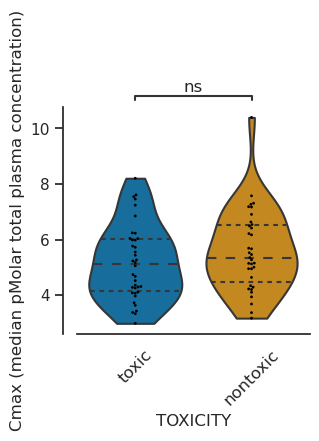

41
median pMolar unbound plasma concentration
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

toxic v.s. nontoxic: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.209e-01 U_stat=1.900e+02
Hi


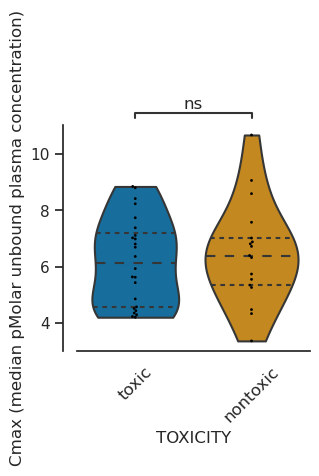

14
47
median pMolar total plasma concentration
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

toxic v.s. nontoxic: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.220e-01 U_stat=2.840e+02
Hi


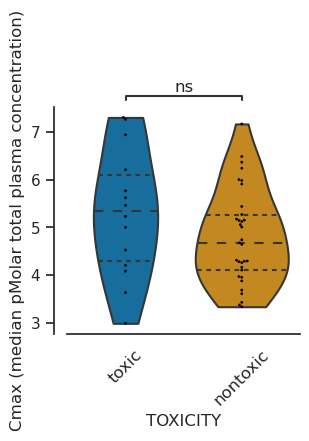

28
median pMolar unbound plasma concentration
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

toxic v.s. nontoxic: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.819e-03 U_stat=1.410e+02
Hi


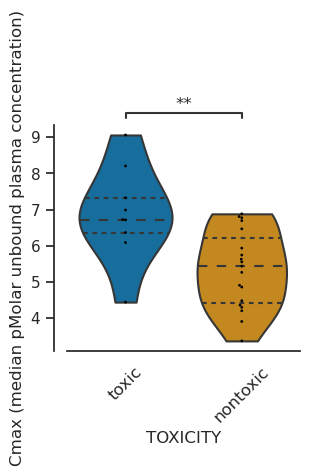

15
40
median pMolar total plasma concentration
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

toxic v.s. nontoxic: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.589e-01 U_stat=2.700e+01
Hi


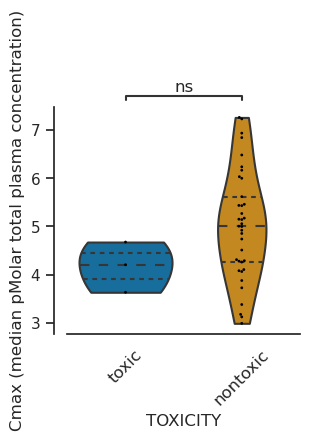

22
median pMolar unbound plasma concentration
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

toxic v.s. nontoxic: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.100e+01
Hi


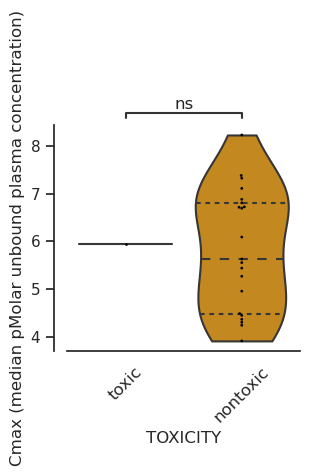

16
19
median pMolar total plasma concentration
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

toxic v.s. nontoxic: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.998e-02 U_stat=1.200e+01
Hi


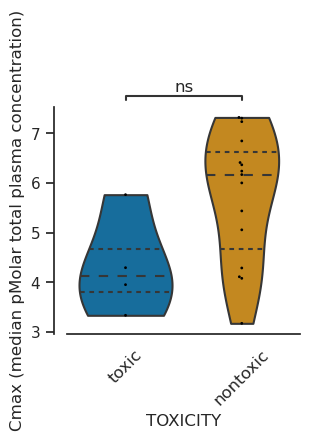

13
median pMolar unbound plasma concentration
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

toxic v.s. nontoxic: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.867e-01 U_stat=8.000e+00
Hi


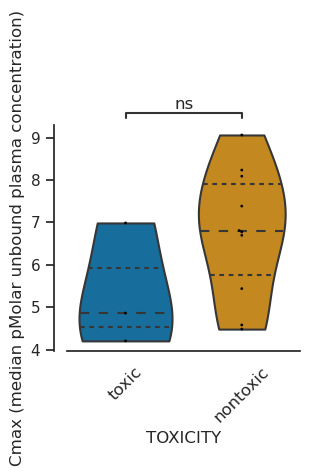

DILI
81
median pMolar total plasma concentration
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

toxic v.s. nontoxic: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.743e-01 U_stat=7.400e+02
Hi


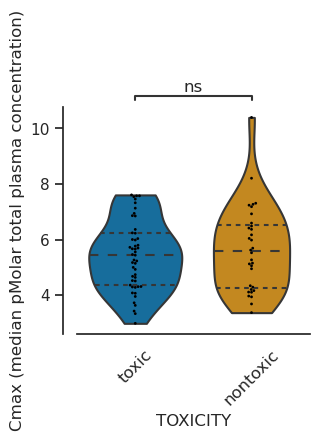

52
median pMolar unbound plasma concentration
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

toxic v.s. nontoxic: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.241e-01 U_stat=2.770e+02
Hi


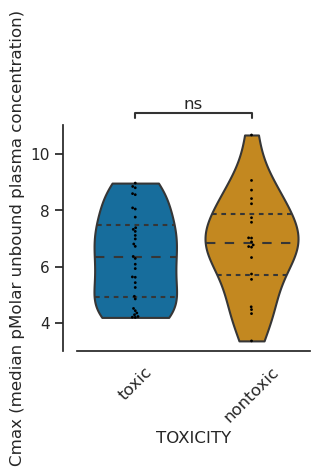

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

# Set a colorblind-friendly palette
colors = sns.color_palette("colorblind")


for i in all_sources_list:
        
    print(i)
    df1 = train_data[train_data["Source_rank"]==i][["smiles_r","TOXICITY"]].drop_duplicates(keep=False).reset_index(drop=True)
    df2 = cmax_data
    df2 = df2.rename(columns={"Standardized_SMILES": "smiles_r"})   
    
    merged_df = pd.merge(df1, df2, on="smiles_r").reset_index(drop=True)
    merged_df['TOXICITY'] = merged_df['TOXICITY'].replace({1: 'toxic', 0: 'nontoxic'})
   
        
    for c_label in ['median pMolar total plasma concentration', 'median pMolar unbound plasma concentration']:
        # Create a figure and axis using Seaborn
        plt.figure(figsize=(3, 3), dpi=100)
        sns.set(style="white")  # Set the style

        merged_df = merged_df.dropna(subset=[c_label]).reset_index(drop=True)
        size = len(merged_df)
        print(size)
        
        if (len(merged_df.TOXICITY.unique())<2):
            continue
        
        # Create the violin plot for Cmax
        ax = sns.violinplot(data=merged_df, x='TOXICITY', y=c_label,
                            palette=colors, inner="quart", cut=0, alpha=0.7)

        # Overlay a swarm plot on top of the violin plot
        sns.swarmplot(data=merged_df, x='TOXICITY', y=c_label,
                      color="black", size=2)

        # Set labels and title
        ax.set_ylabel(f'Cmax ({c_label})', fontsize=12)
        ax.set_xlabel('TOXICITY', fontsize=12)

        # Set x-axis ticks and labels with rotation, increased fontsize
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)

        # Add statistical annotations for pairwise comparisons

        print(c_label)

        add_stat_annotation(ax, data=merged_df, x='TOXICITY', y=c_label, 
                            box_pairs=[('toxic', 'nontoxic')], test='Mann-Whitney', 
                            text_format='star', loc='outside', verbose=2)

        print("Hi")

        # Remove box line, set y-axis on the left
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_position(('outward', 10))
        ax.yaxis.set_ticks_position('left')

        # Show the plot
        plt.savefig(f'{c_label}_violinswarm_comparison_with_stats.png', bbox_inches='tight')
        plt.show()
